In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
# Memuat data
data = pd.read_csv('world happines report 2021.csv')
data

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


# Regresi Linear Sederhana

In [5]:
# Memilih kolom yang relevan
X = data['Logged GDP per capita']
y = data['Ladder score']

# Menghitung rata-rata
mean_X = sum(X) / len(X)
mean_y = sum(y) / len(y)

# Menghitung koefisien (slope)
numerator = sum((X - mean_X) * (y - mean_y))
denominator = sum((X - mean_X) ** 2)
slope = numerator / denominator

# Menghitung intercept
intercept = mean_y - (slope * mean_X)

print(f"Koefisien (Slope): {slope}")
print(f"Intercept: {intercept}")

# Prediksi
prediksi = intercept + slope * X

# Menghitung residual
residuals = y - prediksi

# Menampilkan hasil
print("Prediksi:")
print(prediksi.head())
print("Residuals:")
print(residuals.head())

Koefisien (Slope): 0.7320390899991146
Intercept: -1.371906074131985
Prediksi:
0    6.515815
1    6.631477
2    6.766172
3    6.591215
4    6.630745
Name: Logged GDP per capita, dtype: float64
Residuals:
0    1.326185
1    0.988523
2    0.804828
3    0.962785
4    0.833255
dtype: float64


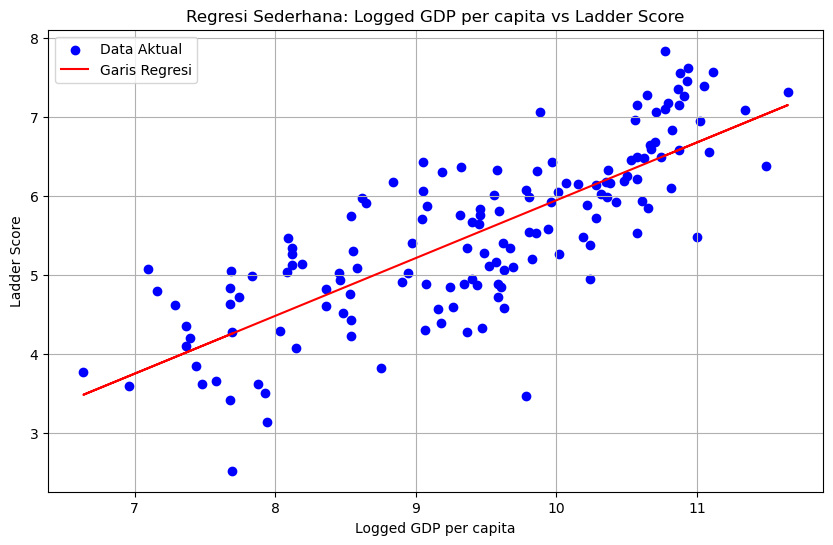

In [6]:
# Membuat grafik
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Aktual')  # Titik data aktual
plt.plot(X, prediksi, color='red', label='Garis Regresi')  # Garis regresi
plt.xlabel('Logged GDP per capita')
plt.ylabel('Ladder Score')
plt.title('Regresi Sederhana: Logged GDP per capita vs Ladder Score')
plt.legend()
plt.grid(True)
plt.show()

Interpretasi:
Hasil analisis regresi linier sederhana menunjukkan adanya hubungan positif yang signifikan antara "Logged GDP per capita" dan "Ladder score". Dengan koefisien slope sebesar 0.732, dapat diartikan bahwa setiap peningkatan satu unit dalam "Logged GDP per capita" diharapkan meningkatkan "Ladder score" sebesar 0.732 unit. Intercept yang bernilai -1.372 menunjukkan nilai prediksi "Ladder score" ketika "Logged GDP per capita" adalah nol, meskipun secara praktis tidak relevan. Prediksi untuk beberapa observasi pertama menunjukkan nilai kebahagiaan yang bervariasi, dengan residual positif yang mengindikasikan bahwa model cenderung meremehkan tingkat kebahagiaan pada beberapa negara. Secara keseluruhan, analisis ini menegaskan bahwa pendapatan per kapita berkontribusi terhadap tingkat kebahagiaan individu, namun faktor lain juga perlu dipertimbangkan untuk pemahaman yang lebih komprehensif.

# Regresi Linear Berganda

In [7]:
# Memilih beberapa kolom untuk regresi berganda
X_multiple = data[['Logged GDP per capita', 'Social support', 'Healthy life expectancy']]
y_multiple = data['Ladder score']

# Menambahkan intercept ke X
X_multiple_with_intercept = np.column_stack((np.ones(len(X_multiple)), X_multiple))

# Menghitung koefisien dengan metode Least Squares
beta = np.linalg.inv(X_multiple_with_intercept.T @ X_multiple_with_intercept) @ X_multiple_with_intercept.T @ y_multiple

print("Koefisien Regresi Berganda:")
print(beta)

# Prediksi
prediksi_multiple = X_multiple_with_intercept @ beta

# Menghitung residual
residuals_multiple = y_multiple - prediksi_multiple

# Menampilkan hasil
print("Prediksi Regresi Berganda:")
print(prediksi_multiple[:5])
print("Residuals Regresi Berganda:")
print(residuals_multiple[:5])

Koefisien Regresi Berganda:
[-2.40583251  0.27334509  3.00051339  0.04486298]
Prediksi Regresi Berganda:
[6.63208502 6.70667763 6.79723403 6.79211743 6.65693923]
Residuals Regresi Berganda:
0    1.209915
1    0.913322
2    0.773766
3    0.761883
4    0.807061
Name: Ladder score, dtype: float64


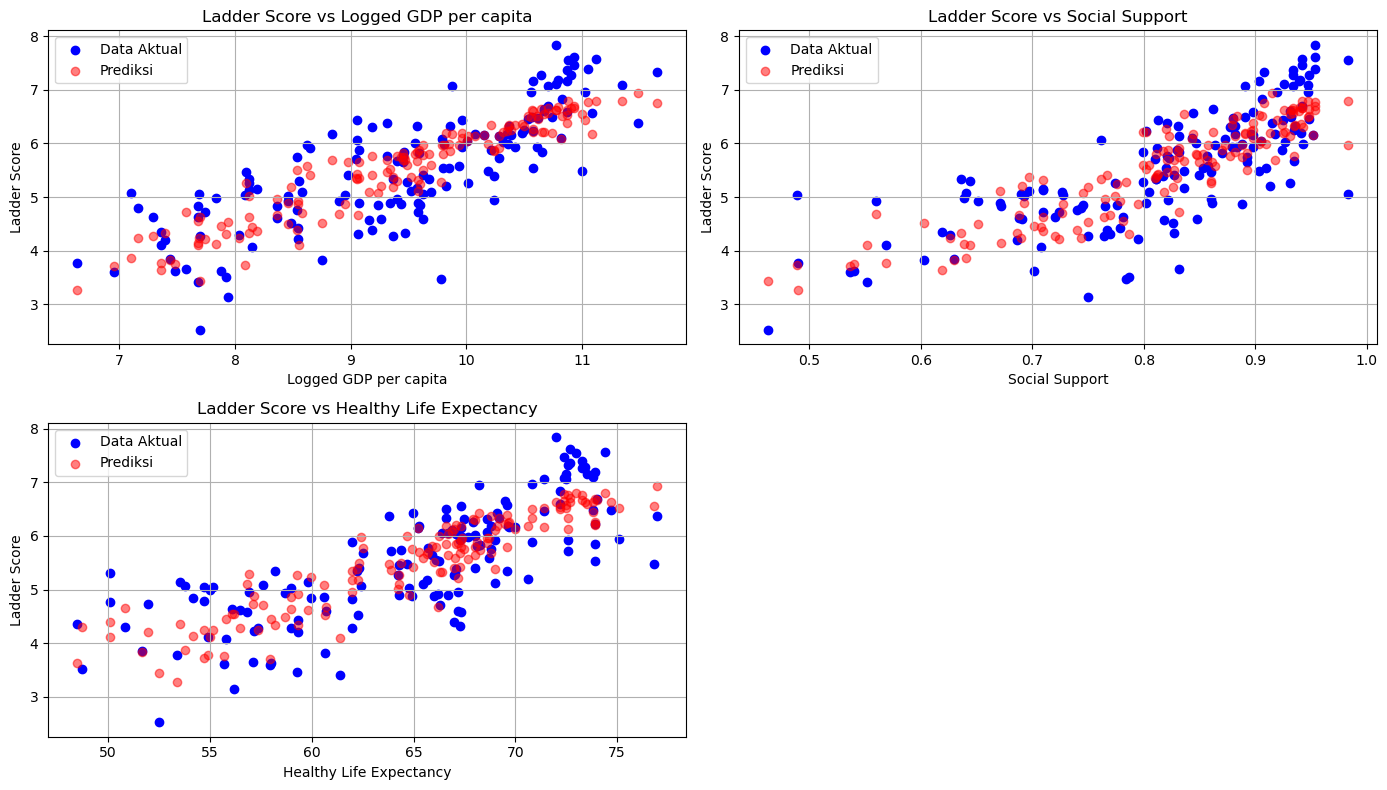

In [8]:
# Membuat grafik
plt.figure(figsize=(14, 8))

# Plot untuk Logged GDP per capita vs Ladder Score
plt.subplot(2, 2, 1)
plt.scatter(data['Logged GDP per capita'], y_multiple, color='blue', label='Data Aktual')
plt.scatter(data['Logged GDP per capita'], prediksi_multiple, color='red', label='Prediksi', alpha=0.5)
plt.xlabel('Logged GDP per capita')
plt.ylabel('Ladder Score')
plt.title('Ladder Score vs Logged GDP per capita')
plt.legend()
plt.grid(True)

# Plot untuk Social Support vs Ladder Score
plt.subplot(2, 2, 2)
plt.scatter(data['Social support'], y_multiple, color='blue', label='Data Aktual')
plt.scatter(data['Social support'], prediksi_multiple, color='red', label='Prediksi', alpha=0.5)
plt.xlabel('Social Support')
plt.ylabel('Ladder Score')
plt.title('Ladder Score vs Social Support')
plt.legend()
plt.grid(True)

# Plot untuk Healthy Life Expectancy vs Ladder Score
plt.subplot(2, 2, 3)
plt.scatter(data['Healthy life expectancy'], y_multiple, color='blue', label='Data Aktual')
plt.scatter(data['Healthy life expectancy'], prediksi_multiple, color='red', label='Prediksi', alpha=0.5)
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Ladder Score')
plt.title('Ladder Score vs Healthy Life Expectancy')
plt.legend()
plt.grid(True)

# Menampilkan semua grafik
plt.tight_layout()
plt.show()

Interpretasi:
Hasil analisis regresi berganda menunjukkan bahwa "Logged GDP per capita", "Social support", dan "Healthy life expectancy" secara signifikan mempengaruhi tingkat kebahagiaan yang diukur melalui "Ladder score". Koefisien regresi menunjukkan bahwa peningkatan satu unit dalam "Logged GDP per capita" berhubungan dengan peningkatan "Ladder score" sebesar 0.273, sementara dukungan sosial memiliki pengaruh yang lebih besar dengan koefisien 3.0005, menunjukkan bahwa faktor sosial sangat penting dalam meningkatkan kebahagiaan. Harapan hidup sehat juga berkontribusi positif, meskipun pengaruhnya lebih kecil. Prediksi model untuk beberapa negara menunjukkan nilai kebahagiaan yang bervariasi, dan residual positif pada beberapa observasi menunjukkan bahwa model mungkin meremehkan tingkat kebahagiaan di negara-negara tersebut. Secara keseluruhan, analisis ini menegaskan pentingnya faktor ekonomi dan sosial dalam menentukan kualitas hidup dan kebahagiaan individu di berbagai negara.

# Uji Hipotesis

In [12]:
# Memilih kolom yang relevan
ladder_scores = data['Ladder score']

# Menentukan hipotesis nol dan alternatif
nilai_h0 = 6.0

# Menghitung rata-rata dan standar deviasi
rata_rata = np.mean(ladder_scores)
std_dev = np.std(ladder_scores, ddof=1)  

# Menghitung ukuran sampel
n = len(ladder_scores)

# Menghitung t-statistic
t_statistic = (rata_rata - nilai_h0) / (std_dev / np.sqrt(n))

# Menghitung p-value (dua sisi)
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=n-1))

# Menampilkan hasil
print(f"Rata-rata Ladder Score: {rata_rata}")
print(f"Standar Deviasi: {std_dev}")
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# Menentukan tingkat signifikansi
alpha = 0.05

if p_value < alpha:
    print("Hipotesis nol (H0) ditolak: Rata-rata Ladder score tidak sama dengan 6.0")
else:
    print("Hipotesis nol (H0) gagal ditolak: Rata-rata Ladder score sama dengan 6.0")

Rata-rata Ladder Score: 5.532838926174497
Standar Deviasi: 1.0739235658235977
t-statistic: -5.30990082593416
p-value: 3.942317705618592e-07
Hipotesis nol (H0) ditolak: Rata-rata Ladder score tidak sama dengan 6.0


Interpretasi:
Hasil analisis uji hipotesis menunjukkan bahwa rata-rata "Ladder score" dalam dataset adalah 5.5328, dengan standar deviasi 1.0739. Nilai t-statistic yang dihitung sebesar -5.3099 menunjukkan seberapa jauh rata-rata sampel berada dari nilai hipotesis nol (6.0) dalam satuan standar deviasi. P-value yang sangat kecil, yaitu 3.94, menunjukkan bahwa ada bukti yang sangat kuat untuk menolak hipotesis nol. Dengan tingkat signifikansi yang ditetapkan pada 0.05, hasil ini mengindikasikan bahwa rata-rata "Ladder score" tidak sama dengan 6.0, dan lebih rendah dari nilai tersebut. Kesimpulan ini menunjukkan bahwa banyak negara dalam dataset mengalami tantangan dalam kualitas hidup dan kesejahteraan masyarakatnya, karena tingkat kebahagiaan mereka berada di bawah apa yang dianggap sebagai standar moderat.

# Uji Asumsi Regresi

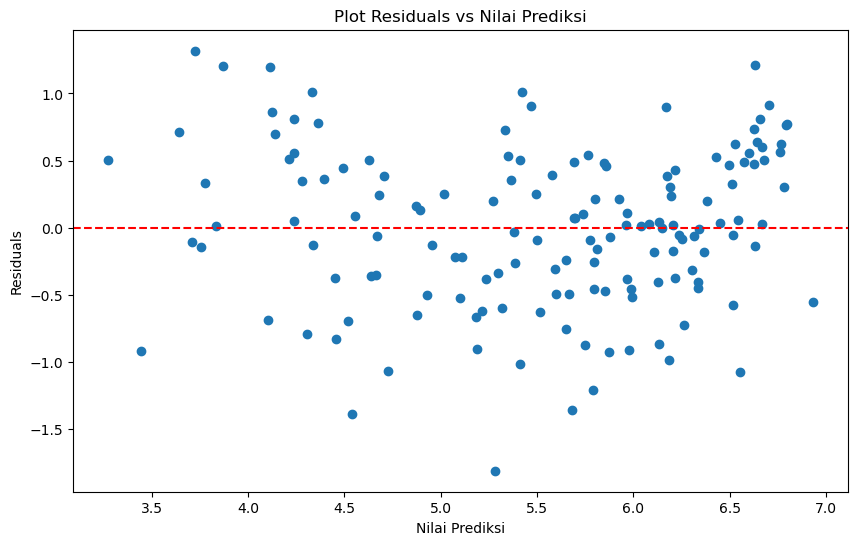

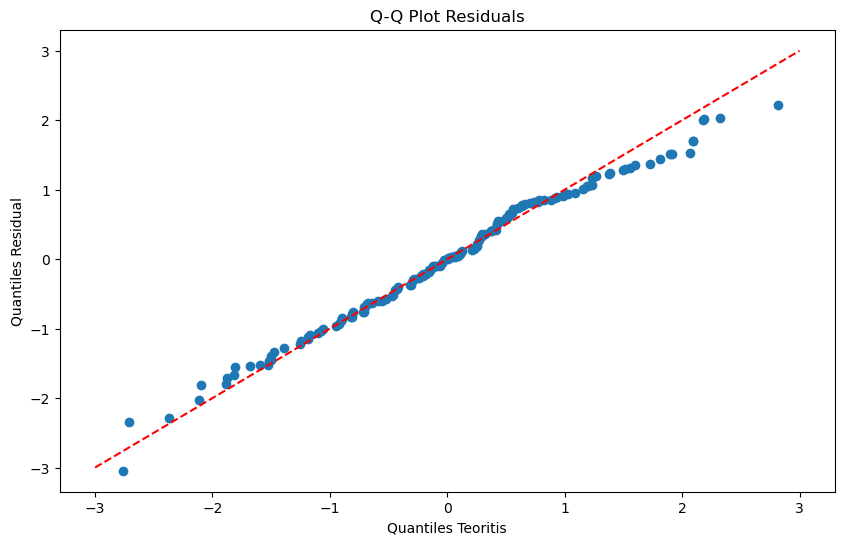

Rata-rata Residual: -4.923727346793983e-14
Standar Deviasi Residual: 0.5951974869401419
Varians Residual: 0.35188246424200886


In [14]:
# Memilih kolom yang relevan untuk analisis regresi
X = data[['Logged GDP per capita', 'Social support', 'Healthy life expectancy']]
y = data['Ladder score']

# Menambahkan intercept ke model
X_with_intercept = np.column_stack((np.ones(len(X)), X))

# Menghitung koefisien regresi menggunakan metode Least Squares
beta = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y

# Menghitung prediksi
prediksi = X_with_intercept @ beta

# Menghitung residual
residuals = y - prediksi

# 1. Uji Linearitas: Residuals vs Fitted Plot
plt.figure(figsize=(10, 6))
plt.scatter(prediksi, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Nilai Prediksi')
plt.ylabel('Residuals')
plt.title('Plot Residuals vs Nilai Prediksi')
plt.show()

# 2. Uji Normalitas: Menghitung rata-rata dan standar deviasi residual
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals, ddof=1)

# Menghitung z-score untuk normalitas
z_scores = (residuals - mean_residuals) / std_residuals

# Q-Q Plot Manual
plt.figure(figsize=(10, 6))
sorted_z_scores = np.sort(z_scores)
theoretical_quantiles = np.sort(np.random.normal(0, 1, len(z_scores)))

plt.scatter(theoretical_quantiles, sorted_z_scores)
plt.plot([-3, 3], [-3, 3], color='red', linestyle='--')  # Garis y=x
plt.xlabel('Quantiles Teoritis')
plt.ylabel('Quantiles Residual')
plt.title('Q-Q Plot Residuals')
plt.show()

# 3. Uji Homoscedasticity: Menghitung varians residual
varians_residuals = np.var(residuals)

print(f"Rata-rata Residual: {mean_residuals}")
print(f"Standar Deviasi Residual: {std_residuals}")
print(f"Varians Residual: {varians_residuals}")

Interpretasi:
Hasil analisis regresi menunjukkan bahwa model memiliki rata-rata residual yang sangat mendekati nol (-4.9237e-14), menandakan bahwa tidak ada bias dalam prediksi model. Standar deviasi residual sebesar 0.5952 dan varians residual 0.3519 menunjukkan variasi yang relatif rendah dalam kesalahan prediksi, yang mengindikasikan kinerja model yang baik. Uji asumsi linearitas dan normalitas residual dapat dilakukan melalui plot residuals vs nilai prediksi dan Q-Q plot, di mana hasil yang baik akan menunjukkan bahwa asumsi-asumsi tersebut terpenuhi. Secara keseluruhan, analisis ini mengindikasikan bahwa model regresi dapat menjelaskan hubungan antara variabel dengan cukup baik tanpa melanggar asumsi-asumsi dasar analisis regresi.